In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset_path = "dataset/30-70cancerChdEtc.csv"

dataset = pd.read_csv(dataset_path)

dataset

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9
...,...,...,...,...,...
2740,Zimbabwe,2005,Probability (%) of dying between age 30 and ex...,Male,22.1
2741,Zimbabwe,2005,Probability (%) of dying between age 30 and ex...,Female,22.9
2742,Zimbabwe,2000,Probability (%) of dying between age 30 and ex...,Both sexes,21.6
2743,Zimbabwe,2000,Probability (%) of dying between age 30 and ex...,Male,21.6


In [4]:
dataset['Indicator'].unique()

array(['Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease'],
      dtype=object)

In [5]:
dataset = dataset.drop('Indicator', axis=1)

In [6]:
dataset = dataset[dataset['Dim1'] == "Both sexes"]

In [7]:
dataset

,Location,Period,Dim1,First Tooltip
0,Afghanistan,2016,Both sexes,29.8
3,Afghanistan,2015,Both sexes,29.8
6,Afghanistan,2010,Both sexes,31.7
9,Afghanistan,2005,Both sexes,34.1
12,Afghanistan,2000,Both sexes,34.4
...,...,...,...,...
2730,Zimbabwe,2016,Both sexes,19.3
2733,Zimbabwe,2015,Both sexes,19.4
2736,Zimbabwe,2010,Both sexes,21.1
2739,Zimbabwe,2005,Both sexes,22.5


In [8]:
thailand_dataset = dataset[dataset['Location'] == 'Thailand']

In [9]:
thailand_dataset

,Location,Period,Dim1,First Tooltip
2415,Thailand,2016,Both sexes,14.5
2418,Thailand,2015,Both sexes,14.6
2421,Thailand,2010,Both sexes,15.8
2424,Thailand,2005,Both sexes,17.7
2427,Thailand,2000,Both sexes,19.2


In [10]:
thailand_dataset = thailand_dataset.rename({'Dim1': 'Gender', 'First Tooltip': 'Value'}, axis=1)

In [11]:
thailand_dataset

,Location,Period,Gender,Value
2415,Thailand,2016,Both sexes,14.5
2418,Thailand,2015,Both sexes,14.6
2421,Thailand,2010,Both sexes,15.8
2424,Thailand,2005,Both sexes,17.7
2427,Thailand,2000,Both sexes,19.2


In [12]:
thailand_chronic_disease_deaths = thailand_dataset[['Period', 'Value']]

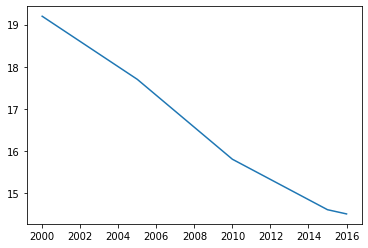

In [13]:
plt.plot(thailand_chronic_disease_deaths['Period'].values, thailand_chronic_disease_deaths['Value'].values)
plt.show()

In [14]:
x = thailand_chronic_disease_deaths['Period'].values.astype(int) - 2000
probs = thailand_chronic_disease_deaths['Value'].values / 100

In [15]:
odds = probs / (1 - probs)

log_odds = np.log(odds)

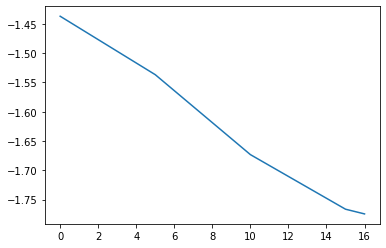

In [16]:
plt.plot(x, log_odds)

In [17]:
b1, b0 = np.polyfit(x, log_odds, deg=1)

In [18]:
b1, b0

(-0.021735942897021965, -1.437579412229065)

In [19]:
from sklearn.feature_selection import f_regression

f_regression(x.reshape(-1, 1), log_odds)

(array([470.59000345]), array([0.00021438]))

In [20]:
def calc_prob(x):
    return 1 / (1 + np.exp(-(b1 * (x - 2000) + b0)))

In [21]:
np.corrcoef(x, log_odds)[0][1]

-0.9968276715824869

In [22]:
calc_prob(2020)

0.13327601742714068

In [23]:
calc_prob(2025)

0.12121462276659456

In [24]:
calc_prob(2030)

0.11010610946757582

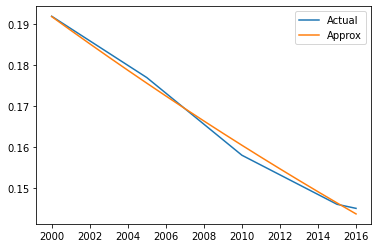

In [25]:
years = np.arange(2000, 2017, 1)

plt.plot(thailand_chronic_disease_deaths['Period'].values.astype(int), thailand_chronic_disease_deaths['Value'].values / 100, label="Actual")
plt.plot(years, calc_prob(years), label="Approx")
plt.legend()
plt.savefig('cancer_prediction.jpg')
plt.show()

In [26]:
residual = log_odds - calc_prob(x + 2000)

In [27]:
from scipy.stats import shapiro, probplot

shapiro(residual)

ShapiroResult(statistic=0.8940046429634094, pvalue=0.3776415288448334)

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([-1.91801095, -1.91266229, -1.83362755, -1.71243369, -1.62898716])),
 (0.1402020506282396, -1.8011443273163266, 0.9583440570886735))

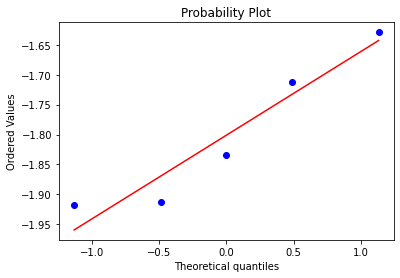

In [28]:
probplot(residual, plot=plt)

In [29]:
np.exp(b1)

0.9784985804411607

---